<a href="https://colab.research.google.com/github/A-Kutscher/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_Amber_Kutscher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Revisted
- Author: Amber Kutscher

# Introduction

<center><img src="https://media-exp1.licdn.com/dms/image/C4D1BAQFHWOY552RTcg/company-background_10000/0/1519796859327?e=2147483647&v=beta&t=4IrZoehp62WxDh6nnNTC5_OBS_J7ra0WdY7tq5nWV2M" width=800px>

<a href="https://www.kaggle.com/code/nitinchoudhary012/big-mart-sales-analysis">Image Source</a></center>

We have been hired by the executive team at Big Mart to conduct a comprehensive analysis of historical product sales across multiple Big Mart outlets. Our primary objective is to develop robust sales forecasts for the year 2023. To achieve this, we are tasked with leveraging data from 1559 unique products distributed among 10 stores located in different cities. Additionally, our analysis will help Big Mart identify top-performing items that contribute significantly to their revenue generation.

<center>We will be following the CRISP-DM workflow for our analysis.  

<center>
<img src="https://raw.githubusercontent.com/coding-dojo-data-science/Example-Project-Analyzing-Ames-Housing/main/Images/CRISP-DM.png" width=600px>


<a href="https://www.datascience-pm.com/crisp-dm-2">Image Source</a></center>

**Our stakeholders are:**
- Big Mart executives and decision-makers.

**Their primary goal is:**
- to identify a predictive model that, given the available data, can anticipate the target variable with accuracy and reliability. The stakeholder wants to maximize processes, resource allocation, and overall business performance by making data-driven decisions and gaining insightful knowledge. An ideal model should be able to reliably forecast outcomes for application in real-world scenarios and have high adaptability to new and unseen data.

**They plan to:**
- use the analysis to shape the overall strategy of the company, prioritize key initiatives, and guide long-term planning in order to maximize profit.

**What do they need/expect?**
- valuable insights and practical recommendations that can guide them in making specific modifications to boost their overall sales performance.


# Data Dictionary

### Link to Original Dataset
https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

### Data Dictionary

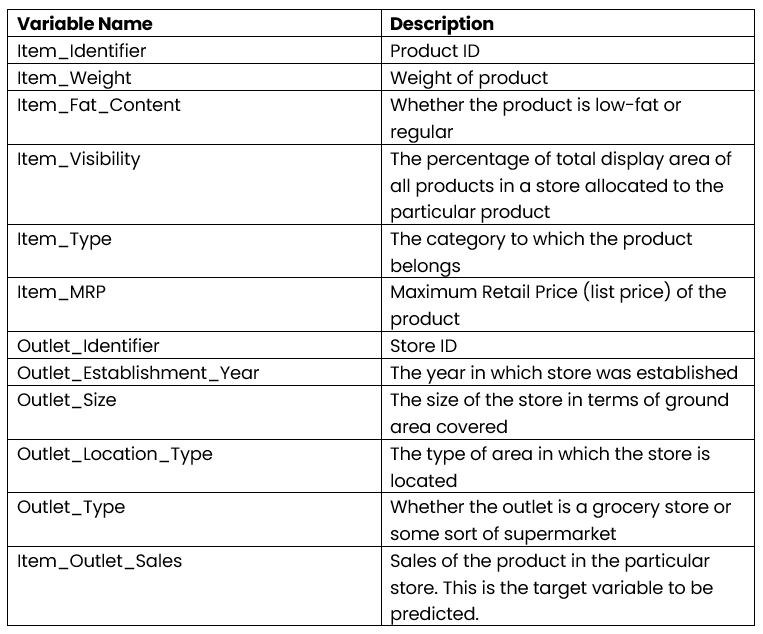

# Imports

In [1]:
# Import Standard Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno

# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Models & evaluation metrics
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# Setting random state for reproducibility
SEED = 321
np.random.seed(SEED)

# Set pandas to display more columns
pd.set_option('display.max_columns', 100)

# Load and Inspect Data

In [2]:
# Save a filepath and load the data under a new name
df_sales_predictions = "Data/sales_predictions_2023.csv"
df = pd.read_csv(df_sales_predictions)
# Display the info for the dataframe
df.info()
# Display the first 5 rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
        'dtype': df.dtypes,
        '# null': df.isna().sum(),
        'null (%)': df.isna().sum()/len(df)*100,
        'nunique': df.nunique(),
        'min': df.min(),
        'max': df.max()})
    report.index.name='Column'
    return report.reset_index()
summarize_df(df)

C:\Users\amber\AppData\Local\Temp\ipykernel_36672\418851850.py:8: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'min': df.min(),
C:\Users\amber\AppData\Local\Temp\ipykernel_36672\418851850.py:9: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'max': df.max()})


,Column,dtype,# null,null (%),nunique,min,max
0,Item_Fat_Content,object,0,0.000000,5,LF,reg
1,Item_Identifier,object,0,0.000000,1559,DRA12,NCZ54
2,Item_MRP,float64,0,0.000000,5938,31.29,266.8884
3,Item_Outlet_Sales,float64,0,0.000000,3493,33.29,13086.9648
4,Item_Type,object,0,0.000000,16,Baking Goods,Starchy Foods
5,Item_Visibility,float64,0,0.000000,7880,0.0,0.328391
6,Item_Weight,float64,1463,17.165317,415,4.555,21.35
7,Outlet_Establishment_Year,int64,0,0.000000,9,1985,2009
8,Outlet_Identifier,object,0,0.000000,10,OUT010,OUT049
9,Outlet_Location_Type,object,0,0.000000,3,Tier 1,Tier 3


In [4]:
# Replace inconsistent categories
fat_content_map = {'LF':'Low Fat',
                  'reg':'Regular',
                  'low fat':'Low Fat'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_map)
# Verify
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [5]:
## Drop unwanted/inappropriate columns 
bad_cols = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']
df = df.drop(columns=bad_cols)

# Train Test Split

In [6]:
# Define target
target = 'Item_Outlet_Sales'
# Define X and y variables
X = df.drop(columns=target).copy()
y = df[target].copy()

# Train-test-split with random state for reproductibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=SEED)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
972,16.750,Low Fat,0.029800,Snack Foods,39.1822,NaN,Tier 2,Supermarket Type1
429,7.935,Low Fat,0.017191,Dairy,51.5350,NaN,Tier 2,Supermarket Type1
6765,8.060,Low Fat,0.021410,Breakfast,229.7326,Medium,Tier 1,Supermarket Type1
5603,11.150,Regular,0.143832,Snack Foods,169.9790,NaN,Tier 3,Grocery Store
5121,17.750,Regular,0.157076,Dairy,240.5538,Medium,Tier 1,Supermarket Type1


# Preprocessing + ColumnTransformer

In [7]:
# Create categorical pipeline
cat_selector = make_column_selector(dtype_include='object')
# Create numeric pipeline
num_selector = make_column_selector(dtype_include='number')

# Make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                        OneHotEncoder(drop='if_binary', handle_unknown='ignore', 
                                      sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

# Make the preprocessing column transformer
preprocessor = make_column_transformer((cat_pipe, cat_selector),
                                      (num_pipe, num_selector),
                                      verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000184EBAFD3C0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000184F20768C0>)],
                  verbose_feature_names_out=False)

In [8]:
# Fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

C:\Users\amber\anaconda3\envs\dojo-env\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_MISSING', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Weight', 'Item_Visibility',
       'Item_MRP'], dtype=object)

# Remaking our X_train and X_test as DataFrames with the New Feature Names

In [9]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                         columns = feature_names, index = X_train.index)
X_train_df.head(3)

,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,16.750,0.029800,39.1822
429,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7.935,0.017191,51.5350
6765,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.060,0.021410,229.7326


In [10]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                        columns = feature_names, index = X_test.index)
X_test_df.head(3)

,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
8077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,15.25,0.061531,132.2968
2391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,17.85,0.044463,127.1020
163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7.27,0.071078,114.2518


In [11]:
y_test.head(3)

8077    1696.4584
2391    2024.0320
163     2618.5914
Name: Item_Outlet_Sales, dtype: float64

In [12]:
def evaluate_regression(model, X_train, y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    # Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    # Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

# LinearRegression

## Fit and evaluate your LinearRegresion model using your dataframe X_train and X_test data.

In [13]:
# Make & fit the modeling pipeline
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.56	RMSE= 1124.60
Test Data:	R^2= 0.56	RMSE= 1143.35


## Extract and visualize the coefficients that your model determined.

In [14]:
lin_reg.coef_

array([ 3.98610421e+01,  1.89612760e+01, -2.13823926e+01,  1.04885981e+02,
        3.51537095e+00, -1.21354859e+01, -4.11460103e+00,  2.53085722e+01,
        1.78934773e+01, -2.90235030e+01, -7.06538584e+01, -2.58951982e+01,
       -1.45020321e+01,  8.08443456e+01,  5.70930436e+00, -8.94914375e+01,
        1.00801809e+01, -1.76048291e+01, -1.38524207e+02,  1.22441200e+02,
        3.36878359e+01, -1.04062667e+02,  8.99276457e+01,  1.41350212e+01,
       -1.57387307e+03,  2.73362204e+02, -1.90439301e+02,  1.49095017e+03,
        7.23048009e-01, -3.16427737e+02,  1.56267878e+01])

In [15]:
# Checking the number of coeffs matches the # of feature names
print(len(lin_reg.coef_))
len(feature_names)

31


31

In [16]:
# Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= feature_names)
coeffs

Item_Fat_Content_Regular             39.861042
Item_Type_Baking Goods               18.961276
Item_Type_Breads                    -21.382393
Item_Type_Breakfast                 104.885981
Item_Type_Canned                      3.515371
Item_Type_Dairy                     -12.135486
Item_Type_Frozen Foods               -4.114601
Item_Type_Fruits and Vegetables      25.308572
Item_Type_Hard Drinks                17.893477
Item_Type_Health and Hygiene        -29.023503
Item_Type_Household                 -70.653858
Item_Type_Meat                      -25.895198
Item_Type_Others                    -14.502032
Item_Type_Seafood                    80.844346
Item_Type_Snack Foods                 5.709304
Item_Type_Soft Drinks               -89.491437
Item_Type_Starchy Foods              10.080181
Outlet_Size_High                    -17.604829
Outlet_Size_MISSING                -138.524207
Outlet_Size_Medium                  122.441200
Outlet_Size_Small                    33.687836
Outlet_Locati

In [17]:
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
coeffs

Item_Fat_Content_Regular              39.86
Item_Type_Baking Goods                18.96
Item_Type_Breads                     -21.38
Item_Type_Breakfast                  104.89
Item_Type_Canned                       3.52
Item_Type_Dairy                      -12.14
Item_Type_Frozen Foods                -4.11
Item_Type_Fruits and Vegetables       25.31
Item_Type_Hard Drinks                 17.89
Item_Type_Health and Hygiene         -29.02
Item_Type_Household                  -70.65
Item_Type_Meat                       -25.90
Item_Type_Others                     -14.50
Item_Type_Seafood                     80.84
Item_Type_Snack Foods                  5.71
Item_Type_Soft Drinks                -89.49
Item_Type_Starchy Foods               10.08
Outlet_Size_High                     -17.60
Outlet_Size_MISSING                 -138.52
Outlet_Size_Medium                   122.44
Outlet_Size_Small                     33.69
Outlet_Location_Type_Tier 1         -104.06
Outlet_Location_Type_Tier 2     

In [18]:
df.select_dtypes('object').nunique()

Item_Fat_Content         2
Item_Type               16
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

In [19]:
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
coeff_rank

Outlet_Type_Grocery Store         31.00
Outlet_Type_Supermarket Type3     30.00
Item_Visibility                   29.00
Outlet_Type_Supermarket Type1     28.00
Outlet_Type_Supermarket Type2     27.00
Outlet_Size_MISSING               26.00
Outlet_Size_Medium                25.00
Item_Type_Breakfast               24.00
Outlet_Location_Type_Tier 1       23.00
Outlet_Location_Type_Tier 2       22.00
Item_Type_Soft Drinks             21.00
Item_Type_Seafood                 20.00
Item_Type_Household               19.00
Item_Fat_Content_Regular          18.00
Outlet_Size_Small                 17.00
Item_Type_Health and Hygiene      16.00
Item_Type_Meat                    15.00
Item_Type_Fruits and Vegetables   14.00
Item_Type_Breads                  13.00
Item_Type_Baking Goods            12.00
Item_Type_Hard Drinks             11.00
Outlet_Size_High                  10.00
Item_MRP                           9.00
Item_Type_Others                   8.00
Outlet_Location_Type_Tier 3        7.00


In [20]:
top_n_features = coeff_rank.head(10)
top_n_features

Outlet_Type_Grocery Store       31.00
Outlet_Type_Supermarket Type3   30.00
Item_Visibility                 29.00
Outlet_Type_Supermarket Type1   28.00
Outlet_Type_Supermarket Type2   27.00
Outlet_Size_MISSING             26.00
Outlet_Size_Medium              25.00
Item_Type_Breakfast             24.00
Outlet_Location_Type_Tier 1     23.00
Outlet_Location_Type_Tier 2     22.00
dtype: float64

In [21]:
# Slicing out the top_n_features names to visualize
plot_vals = coeffs.loc[top_n_features.index]
plot_vals

Outlet_Type_Grocery Store       -1,573.87
Outlet_Type_Supermarket Type3    1,490.95
Item_Visibility                   -316.43
Outlet_Type_Supermarket Type1      273.36
Outlet_Type_Supermarket Type2     -190.44
Outlet_Size_MISSING               -138.52
Outlet_Size_Medium                 122.44
Item_Type_Breakfast                104.89
Outlet_Location_Type_Tier 1       -104.06
Outlet_Location_Type_Tier 2         89.93
dtype: float64

In [22]:
top_n = 15
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n).index
plot_vals = coeffs.loc[top_n_features].sort_values()
plot_vals

Outlet_Type_Grocery Store       -1,573.87
Item_Visibility                   -316.43
Outlet_Type_Supermarket Type2     -190.44
Outlet_Size_MISSING               -138.52
Outlet_Location_Type_Tier 1       -104.06
Item_Type_Soft Drinks              -89.49
Item_Type_Household                -70.65
Outlet_Size_Small                   33.69
Item_Fat_Content_Regular            39.86
Item_Type_Seafood                   80.84
Outlet_Location_Type_Tier 2         89.93
Item_Type_Breakfast                104.89
Outlet_Size_Medium                 122.44
Outlet_Type_Supermarket Type1      273.36
Outlet_Type_Supermarket Type3    1,490.95
dtype: float64

In [23]:
def plot_coeffs(coeffs, top_n=None, intercept=False, figsize=(8,6),
                annotate=False, ha='left', va='center', size=12, xytext=(4,0),
                textcoords='offset points', save_filename=None):
    """Plots the top_n coefficients from a Series, with optional annotations."""
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
    if top_n==None:
        # Sort all features and set title
        plot_vals = coeffs#.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        # Rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        # Sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
    # Plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
           ylabel='Feature Names', 
           title=title)
    ax.axvline(0, color='k')
    
    if annotate==True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext,
                       textcoords=textcoords)
        
    # Save the figure as a .png file
    if save_filename:
        plt.savefig(save_filename)
    
    # Return ax in case want to continue to update/modify figure
    return ax

def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        # Calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2
        # get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

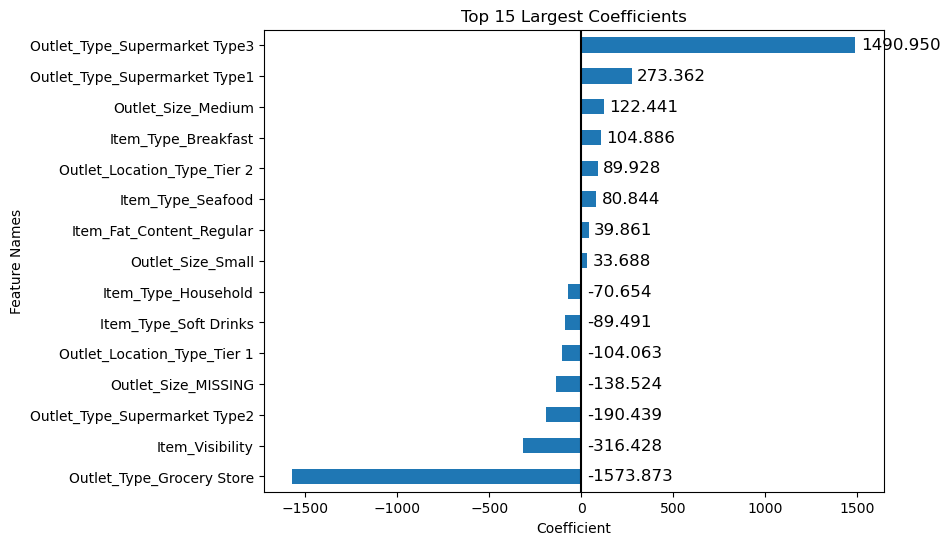

In [24]:
plot_coeffs(coeffs, top_n=15, intercept=False, annotate=True, save_filename='Images/lin_reg_coeffs.png');

## Select the top 3 most impactful features and interpret their coefficients

The top 3 most impactful features are:
1. Outlet_Type_Grocery Store (-1,573.87):
    - This feature has the most significant impact on the target variable.
    - A store classified as "Grocery Store" has a substantial negative effect on the target variable. In this context, it indicates that items sold in grocery stores tend to have much lower sales compared to other types of outlets.

2. Outlet_Type_Supermarket Type3 (1,490.95):
    - Supermarket Type3 is the second most impactful feature with a large positive coefficient.
    - Items sold in "Supermarket Type3" outlets have a substantial positive effect on sales, suggesting that this type of outlet tends to have significantly higher sales compared to other outlet types.

3. Item_Visibility (-316.43):
    - The third most impactful feature is "Item_Visibility."
    - This feature has a significant negative impact on sales. It indicates that as the visibility of an item in a store decreases, the sales tend to increase. This might be counterintuitive, and further analysis is needed to understand why this is the case. It could be due to outliers or specific patterns in the data.

# Tree-Based Model

## Fit and evaluate your tree-based regression model using your dataframe X_train and X_test data.

In [25]:
# Make and fit model
rf_reg = RandomForestRegressor(random_state=SEED)
rf_reg.fit(X_train_df, y_train)
evaluate_regression(rf_reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.94	RMSE= 429.57
Test Data:	R^2= 0.56	RMSE= 1153.87


## Extract and visualize the feature importances that your model determined.

In [26]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    # Checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    # Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    # Sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [27]:
importances = get_importances(rf_reg, sort=True, ascending=False)
importances

Item_MRP                          0.45
Outlet_Type_Grocery Store         0.19
Item_Visibility                   0.11
Outlet_Type_Supermarket Type3     0.07
Item_Weight                       0.05
Outlet_Size_Small                 0.01
Item_Type_Snack Foods             0.01
Item_Fat_Content_Regular          0.01
Item_Type_Fruits and Vegetables   0.01
Item_Type_Household               0.01
Item_Type_Dairy                   0.01
Outlet_Size_MISSING               0.01
Outlet_Location_Type_Tier 1       0.01
Outlet_Location_Type_Tier 2       0.01
Item_Type_Frozen Foods            0.01
Outlet_Size_Medium                0.01
Item_Type_Soft Drinks             0.00
Item_Type_Baking Goods            0.00
Item_Type_Canned                  0.00
Item_Type_Health and Hygiene      0.00
Outlet_Size_High                  0.00
Outlet_Location_Type_Tier 3       0.00
Item_Type_Meat                    0.00
Outlet_Type_Supermarket Type1     0.00
Item_Type_Breads                  0.00
Item_Type_Starchy Foods  

In [28]:
def plot_importance(importances, top_n=None, figsize=(12,8),
                    save_filename=None):
    # Sorting with asc=false for correct order of bars
    if top_n==None:
        # Sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        # Sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    # Plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)

     # Save the figure as a .png file
    if save_filename:
        plt.savefig(save_filename)

    # Return ax in case want to continue to update/modify figure
    return ax

<Axes: title={'center': 'All Features - Ranked by Importance'}, xlabel='Importance', ylabel='Feature Names'>

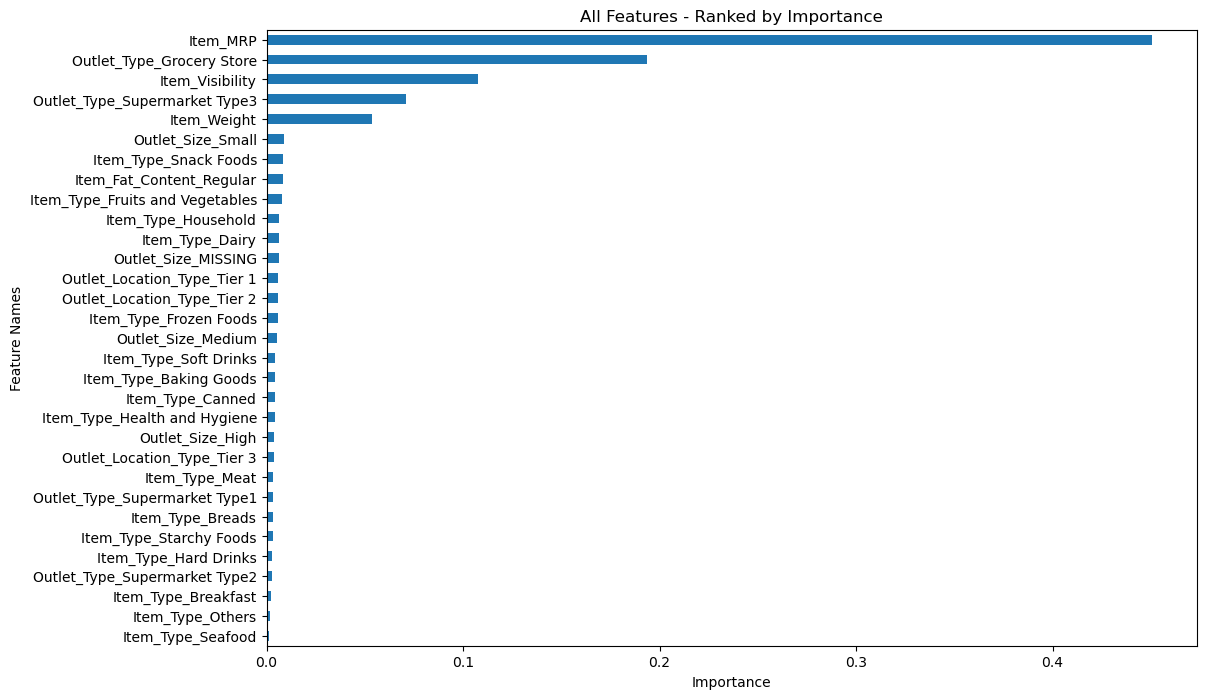

In [29]:
# Testing our function
plot_importance(importances)

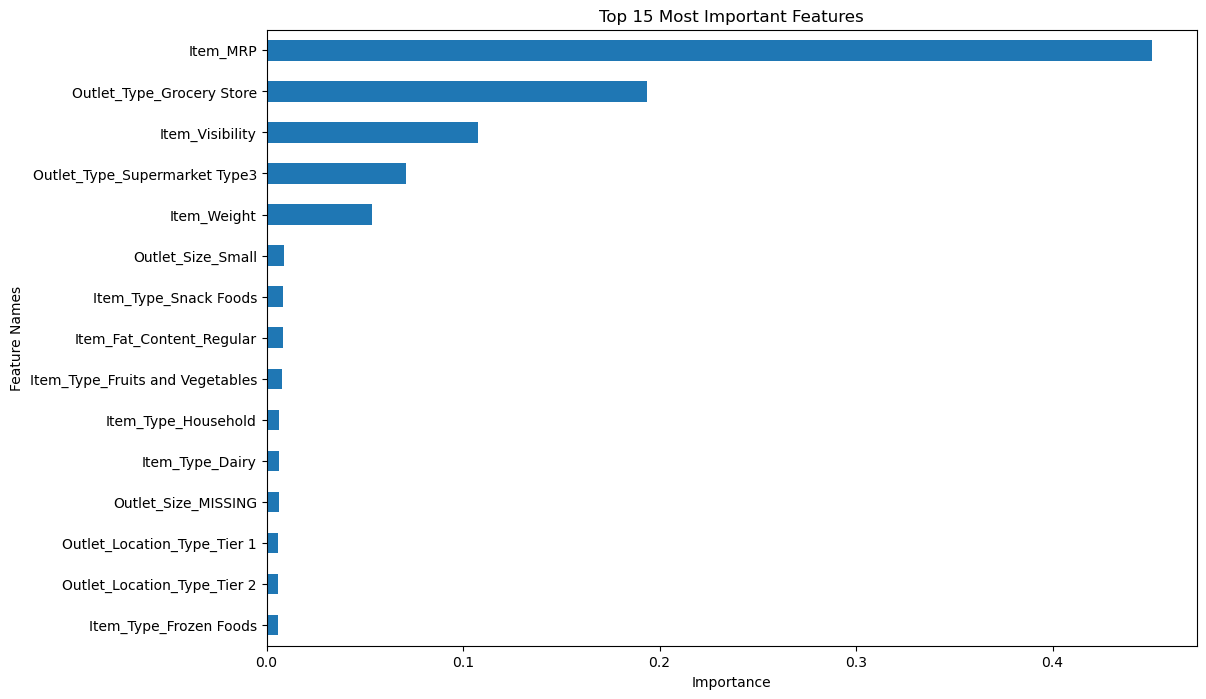

In [30]:
# Testing our function
importances = get_importances(rf_reg, sort=True, ascending=False,
                              name="RandomForest Importances")
plot_importance(importances, top_n=15, save_filename='Images/randomforest_coeffs.png');

## Identify the top 5 most important features.

The top 5 most important features are:
1. Item_MRP (0.45):
    - This feature has the highest importance score, indicating that it has the most significant impact on the target variable. Item Maximum Retails Price (MRP) is a crucial factor in determining sales.

2. Outlet_Type_Grocery Store (0.19):
    - The type of outlet being a "Grocery Store" is the second most important feature. It suggests that this type of outlet significantly affects sales, likely indicating lower sales compared to other outlet types.

3. Item_Visibility (0.11):
    - Item visibility plays a substantial role in sales. However, it has a negative impact, suggesting that as item visibility increases, sales tend to decrease.

4. Outlet_Type_Supermarket Type3 (0.07):
    - The presence of "Supermarket Type3" is the fourth most important feature. It has a positive impact on sales, indicating higher sales in this type of outlet.

5. Item_Weight (0.05):
    - Item weight is the fifth most important feature, but its impact is relatively smaller compared to the top features. It suggests that the weight of items may have some influence on sales.

# Serialize Your Best Models with Joblib

- Once you've finished updating and explaining your models, you must save the following key: value pairs as a dictionary in a joblib file named "best-models.joblib":
    - "preprocessor": your preprocessing  column transformer
    - "X_train": your training features.
    - "X_test": your test features.
    - "y_train": your training target.
    - "y_test": your test target.
    - "LinearRegression": your best linear regression
    - Your tree-based model's class name: your best tree-based model.
        - e.g. "RandomForestRegressor"/"DecisionTreeRegressor"
    - Save your joblib file inside your repository. (You will work with these models again in the next core assignment.)

In [31]:
# creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
          'LinearRegression':lin_reg,
         'RandomForestRegressor':rf_reg}
joblib.dump(export, 'best-models.joblib')

['best-models.joblib']